In [1]:
import liana 
import anndata
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import wilcoxon
import anndata
import scanpy as sc
from liana.mt import rank_aggregate
from liana.mt import singlecellsignalr, connectome, cellphonedb, natmi, logfc, cellchat, geometric_mean
import numpy as np
from matplotlib.pyplot import figure
import math
from scipy.stats import wilcoxon
import seaborn as sns
import matplotlib.gridspec as grid_spec

%matplotlib inline

# Cardiac spatial(100) 

In [31]:
# load datasets
adata = sc.read_h5ad("../../data/raw_data/Cardiac_cells//Visium-FZ_GT_P19.h5ad")
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)
sc.tl.pca(adata)
sc.pp.neighbors(adata)
sc.tl.leiden(adata)
matrix = pd.DataFrame.sparse.from_spmatrix(adata.X,index=adata.obs.index.tolist(),columns=adata.var["feature_name"].tolist())

meta = pd.DataFrame({"cell":adata.obs.index.tolist(),"label":adata.obs["cell_type_original"].tolist()})
meta = meta[meta["label"] != "Lymphoid"]
meta.index = meta["cell"].tolist()

matrix = matrix.transpose()

matrix = matrix[meta.index.tolist()]

from scipy.stats import wilcoxon
import anndata
import scanpy as sc

index = matrix.index.tolist()

meta['label'] = meta["label"].astype("string").tolist()

meta["cell"] = meta["cell"].astype("category")
meta["label"] = meta["label"].astype("category")

matrix = matrix.loc[:,~matrix.columns.duplicated()].copy()
meta = meta.loc[~meta.index.duplicated(),:].copy()

adata = anndata.AnnData(matrix.transpose())
adata.raw = adata
adata.obs = meta
adata.obs["label"] = adata.obs["label"].astype("category")
sc.tl.rank_genes_groups(adata, 'label')
import pandas as pd

# Your existing code


for expr_prop_value in range(0, 100, 1):
    expr_prop_value =/ 100  # Convert to float
##############################################
#     connectome(adata, groupby="label", expr_prop=expr_prop_value)
#     spatial_connectome_df = adata.uns["liana_res"][["source", "target", "ligand", "receptor", "expr_prod"]].sort_values("expr_prod", ascending=False)
    
#     # Filter and take the top 1000 rows
#     spatial_connectome_df = spatial_connectome_df[spatial_connectome_df["source"] != spatial_connectome_df["target"]]
#     temp_connectome_df = spatial_connectome_df.head(1000)
#     # #输出为CSV
#     temp_connectome_df.to_csv(f"../../results/connectome/connectome_{i+1}_random.csv")


##############################################  
#     cellphonedb(adata, groupby="label", expr_prop=expr_prop_value)
#     spatial_cellphonedb_df = adata.uns["liana_res"][["source", "target", "ligand", "receptor", "."]].sort_values("lr_means", ascending=False)

#     # Filter and take the top 1000 rows
#     spatial_cellphonedb_df = spatial_cellphonedb_df[spatial_cellphonedb_df["source"] != spatial_cellphonedb_df["target"]]
#     temp_cellphonedb_df = spatial_cellphonedb_df.head(1000)
#     # #输出为CSV
#     temp_cellphonedb_df.to_csv(f"../../results/cellphonedb/cellphonedb_{i+1}_random.csv")
##############################################

    cellchat(adata, groupby="label", expr_prop=expr_prop_value)
    spatial_cellchat_df = adata.uns["liana_res"][["source", "target", "ligand", "receptor", "lr_probs"]].sort_values("lr_probs", ascending=False)
    # Filter and take the top 1000 rows
    spatial_cellchat_df = spatial_cellchat_df[spatial_cellchat_df["source"] != spatial_cellchat_df["target"]]
    temp_cellchat_df = spatial_cellchat_df.head(1000)
    # #输出为CSV
    temp_cellchat_df.to_csv(f"../../results/cellchat/cellchat_{i+1}_random.csv")
    i = i+1






# PC 9 lung cancer

In [43]:
from scipy.stats import wilcoxon
import anndata
import scanpy as sc
CellGAT_PC9_result = []
Connectome_PC9_result = []
CellphoneDB_PC9_result = []
CellChat_PC9_result = []
A = 0
for j in range (0,100,1):
    A += 1 
    expr_prop_value =  j/100*0.8
    # Day0
    matrix = pd.read_csv("../../data/CellGATv2_Input/Pre_Post/Day0/matrix.csv",index_col=0)
    matrix.index = [str(i).upper() for i in matrix.index.tolist()]
    index = matrix.index.tolist()
    matrix = matrix.fillna(0)
    adata = anndata.AnnData(matrix.transpose())
    sc.pp.normalize_total(adata)
    sc.pp.neighbors(adata)
    sc.tl.leiden(adata)
    meta = pd.DataFrame({"cell":adata.obs["leiden"].index.tolist(),"label":adata.obs["leiden"].tolist()})
    meta.index = meta["cell"].tolist()

    adata = anndata.AnnData(matrix.transpose())
    adata.raw = adata
    adata.obs = meta
    adata.obs["label"] = adata.obs["label"].astype("category")
    sc.tl.rank_genes_groups(adata, 'label')

    connectome(adata,groupby="label",expr_prop=expr_prop_value)
    connectome_df = adata.uns["liana_res"][["source","target","ligand","receptor","expr_prod"]].sort_values("expr_prod",ascending=False)
    cellphonedb(adata,groupby="label",expr_prop=expr_prop_value)
    cellphone_df = adata.uns["liana_res"][["source","target","ligand","receptor","lr_means"]].sort_values("lr_means",ascending=False)
    cellchat(adata,groupby="label",expr_prop=expr_prop_value)
    cellchat_df = adata.uns["liana_res"][["source","target","ligand","receptor","lr_probs"]].sort_values("lr_probs",ascending=False)

    day0_list = [connectome_df,cellphone_df,cellchat_df]

    # Day 7_1
    matrix = pd.read_csv("../../data/CellGATv2_Input/Pre_Post/Day7_1/matrix.csv",index_col=0)

    matrix.index = [str(i).upper() for i in matrix.index.tolist()]


    index = matrix.index.tolist()

    matrix = matrix.fillna(0)

    adata = anndata.AnnData(matrix.transpose())

    sc.pp.normalize_total(adata)
    sc.pp.neighbors(adata)
    sc.tl.leiden(adata)

    meta = pd.DataFrame({"cell":adata.obs["leiden"].index.tolist(),"label":adata.obs["leiden"].tolist()})

    meta.index = meta["cell"].tolist()

    adata = anndata.AnnData(matrix.transpose())
    adata.raw = adata
    adata.obs = meta
    adata.obs["label"] = adata.obs["label"].astype("category")
    sc.tl.rank_genes_groups(adata, 'label')

    connectome(adata,groupby="label",expr_prop=expr_prop_value)
    connectome_df = adata.uns["liana_res"][["source","target","ligand","receptor","expr_prod"]].sort_values("expr_prod",ascending=False)
    cellphonedb(adata,groupby="label",expr_prop=expr_prop_value)
    cellphone_df = adata.uns["liana_res"][["source","target","ligand","receptor","lr_means"]].sort_values("lr_means",ascending=False)
    cellchat(adata,groupby="label",expr_prop=expr_prop_value)
    cellchat_df = adata.uns["liana_res"][["source","target","ligand","receptor","lr_probs"]].sort_values("lr_probs",ascending=False)

    day7_rep1_list = [connectome_df,cellphone_df,cellchat_df]

    # Day 7_2
    matrix = pd.read_csv("../../data/CellGATv2_Input/Pre_Post/Day7_2/matrix.csv",index_col=0)

    matrix.index = [str(i).upper() for i in matrix.index.tolist()]

    index = matrix.index.tolist()

    matrix = matrix.fillna(0)

    adata = anndata.AnnData(matrix.transpose())


    sc.pp.normalize_total(adata)
    sc.pp.neighbors(adata)
    sc.tl.leiden(adata)

    meta = pd.DataFrame({"cell":adata.obs["leiden"].index.tolist(),"label":adata.obs["leiden"].tolist()})

    meta.index = meta["cell"].tolist()

    adata = anndata.AnnData(matrix.transpose())
    adata.raw = adata
    adata.obs = meta
    adata.obs["label"] = adata.obs["label"].astype("category")
    sc.tl.rank_genes_groups(adata, 'label')
    pval_df = pd.DataFrame.from_records(adata.uns["rank_genes_groups"]["pvals"])
    pval_df.index = matrix.index.tolist()
    cell_type_df = {}
    for i in pval_df.columns.tolist():
        sub = pval_df[i]
        sub = sub[sub < 0.05]
        cell_type_df[i] = sub.index.tolist()
        
    connectome(adata,groupby="label",expr_prop=expr_prop_value)
    connectome_df = adata.uns["liana_res"][["source","target","ligand","receptor","expr_prod"]].sort_values("expr_prod",ascending=False)
    cellphonedb(adata,groupby="label",expr_prop=expr_prop_value)
    cellphone_df = adata.uns["liana_res"][["source","target","ligand","receptor","lr_means"]].sort_values("lr_means",ascending=False)
    cellchat(adata,groupby="label",expr_prop=expr_prop_value)
    cellchat_df = adata.uns["liana_res"][["source","target","ligand","receptor","lr_probs"]].sort_values("lr_probs",ascending=False)

    day7_rep2_list = [connectome_df,cellphone_df,cellchat_df]

    # pathway analysis
    pathways = pd.read_csv("../../data/LR_database/kegg_pathways.csv")
    Omnipath_db = pd.read_csv("../../data/LR_database/consensus_Omnipath.csv",index_col=0)[["source","target"]].drop_duplicates()
    Omnipath_db.columns = ["from","to"]
    Omnipath_db = Omnipath_db.drop_duplicates()

    day0_list = [i[(i["ligand"].isin(Omnipath_db["from"].tolist()))&(i["receptor"].isin(Omnipath_db["to"].tolist()))] for i in day0_list]
    day7_rep1_list = [i[(i["ligand"].isin(Omnipath_db["from"].tolist()))&(i["receptor"].isin(Omnipath_db["to"].tolist()))] for i in day7_rep1_list]
    day7_rep2_list = [i[(i["ligand"].isin(Omnipath_db["from"].tolist()))&(i["receptor"].isin(Omnipath_db["to"].tolist()))] for i in day7_rep2_list]

    total_day7_1 = pd.read_csv(f"../../data/CellGATv2_100_times/Pre_Post/Day0/Day0_{A+1}_random.csv",index_col=0)[["Src","Dst"]]
    total_day7_2 = pd.read_csv(f"../../data/CellGATv2_100_times/Pre_Post/Day7_1/Rep1_{A+1}_random.csv",index_col=0)[["Src","Dst"]]
    total_day0 = pd.read_csv(f"../../data/CellGATv2_100_times/Pre_Post/Day7_2/Rep2_{A+1}_random.csv",index_col=0)[["Src","Dst"]]

    total_day7_1 = total_day7_1[(total_day7_1["Src"].isin(Omnipath_db["from"].tolist()))&(total_day7_1["Dst"].isin(Omnipath_db["to"].tolist()))]
    total_day7_2 = total_day7_2[(total_day7_2["Src"].isin(Omnipath_db["from"].tolist()))&(total_day7_2["Dst"].isin(Omnipath_db["to"].tolist()))]
    total_day0 = total_day0[(total_day0["Src"].isin(Omnipath_db["from"].tolist()))&(total_day0["Dst"].isin(Omnipath_db["to"].tolist()))]
    pathways.index = pathways["genesymbol"].tolist()
    day0_list = [i[(i["ligand"].isin(pathways["genesymbol"].tolist()))&(i["receptor"].isin(pathways["genesymbol"].tolist()))] for i in day0_list]
    day7_rep1_list = [i[(i["ligand"].isin(pathways["genesymbol"].tolist()))&(i["receptor"].isin(pathways["genesymbol"].tolist()))] for i in day7_rep1_list]
    day7_rep2_list = [i[(i["ligand"].isin(pathways["genesymbol"].tolist()))&(i["receptor"].isin(pathways["genesymbol"].tolist()))] for i in day7_rep2_list]

    total_day7_1 = pd.read_csv(f"../../data/CellGATv2_100_times/Pre_Post/Day0/Day0_{A+1}_random.csv",index_col=0)[["Src","Dst"]]
    total_day7_2 = pd.read_csv(f"../../data/CellGATv2_100_times/Pre_Post/Day7_1/Rep1_{A+1}_random.csv",index_col=0)[["Src","Dst"]]
    total_day0 = pd.read_csv(f"../../data/CellGATv2_100_times/Pre_Post/Day7_2/Rep2_{A+1}_random.csv",index_col=0)[["Src","Dst"]]

    total_day7_1 = total_day7_1[(total_day7_1["Src"].isin(pathways["genesymbol"].tolist()))&(total_day7_1["Dst"].isin(pathways["genesymbol"].tolist()))]
    total_day7_2 = total_day7_2[(total_day7_2["Src"].isin(pathways["genesymbol"].tolist()))&(total_day7_2["Dst"].isin(pathways["genesymbol"].tolist()))]
    total_day0 = total_day0[(total_day0["Src"].isin(pathways["genesymbol"].tolist()))&(total_day0["Dst"].isin(pathways["genesymbol"].tolist()))]
    pathways = pathways.drop_duplicates("genesymbol")
    pathways.index = pathways["genesymbol"].tolist()

    for i in day0_list:
        i["Ligand Pathway"] = pathways.loc[i["ligand"].tolist()]["pathway"].tolist()
        i["Receptor Pathway"] = pathways.loc[i["receptor"].tolist()]["pathway"].tolist()
        
    for i in day7_rep1_list:
        i["Ligand Pathway"] = pathways.loc[i["ligand"].tolist()]["pathway"].tolist()
        i["Receptor Pathway"] = pathways.loc[i["receptor"].tolist()]["pathway"].tolist()
        
    for i in day7_rep2_list:
        i["Ligand Pathway"] = pathways.loc[i["ligand"].tolist()]["pathway"].tolist()
        i["Receptor Pathway"] = pathways.loc[i["receptor"].tolist()]["pathway"].tolist()
        
    total_day0["Ligand Pathway"] = pathways.loc[total_day0["Src"].tolist()]["pathway"].tolist()
    total_day0["Receptor Pathway"] = pathways.loc[total_day0["Dst"].tolist()]["pathway"].tolist()
    total_day7_1["Ligand Pathway"] = pathways.loc[total_day7_1["Src"].tolist()]["pathway"].tolist()
    total_day7_1["Receptor Pathway"] = pathways.loc[total_day7_1["Dst"].tolist()]["pathway"].tolist()
    total_day7_2["Ligand Pathway"] = pathways.loc[total_day7_2["Src"].tolist()]["pathway"].tolist()
    total_day7_2["Receptor Pathway"] = pathways.loc[total_day7_2["Dst"].tolist()]["pathway"].tolist()
    day0_list = [i.head(1000) for i in day0_list]
    day7_rep1_list = [i.head(1000) for i in day7_rep1_list]
    day7_rep2_list = [i.head(1000) for i in day7_rep2_list]

    total_day0 = total_day0.head(1000)
    total_day7_1 = total_day7_1.head(1000)
    total_day7_2 = total_day7_2.head(1000)
    grouped_day_7_1_list = [i.groupby("Receptor Pathway").count().sort_values("ligand",ascending=False) for i in day7_rep2_list]
    grouped_day_7_1 = total_day7_2.groupby("Receptor Pathway").count().sort_values("Src",ascending=False)
    grouped_day_7_1_list[0].to_csv("../../results/Pre_Post_1/connectome_day7_2_receptor.csv")
    grouped_day_7_1_list[1].to_csv("../../results/Pre_Post_1/cellphone_day7_2_receptor.csv")
    grouped_day_7_1_list[2].to_csv("../../results/Pre_Post_1/cellchat_day7_2_receptor.csv")
    grouped_day_7_1.to_csv("../../results/Pre_Post_1/CellGATv2_day7_2_receptor.csv")

    day0_list = [i[["ligand","receptor"]].drop_duplicates() for i in day0_list]
    day7_rep1_list = [i[["ligand","receptor"]].drop_duplicates() for i in day7_rep1_list]
    day7_rep2_list = [i[["ligand","receptor"]].drop_duplicates() for i in day7_rep2_list]   
    original_day0 = day0_list
    original_day7_rep1 = day7_rep1_list
    original_day7_rep2 = day7_rep2_list
    day0_list = [i.head(50) for i in day0_list]
    day7_rep1_list = [i.head(50) for i in day7_rep1_list]
    day7_rep2_list = [i.head(50) for i in day7_rep2_list]
    pathways = pd.read_csv("../../data/LR_database/kegg_pathways.csv")
    for i in day0_list:
        i["Ligand Pathway"] = [pathways[pathways["genesymbol"]==j]["pathway"] for j in i["ligand"].tolist()]

    Omnipath_db = pd.read_csv("../../data/LR_database/consensus_Omnipath.csv",index_col=0)[["source","target"]].drop_duplicates()
    Omnipath_db.columns = ["from","to"]
    Omnipath_db = Omnipath_db.drop_duplicates()

    day0_list = [pd.merge(i,Omnipath_db,left_on=["ligand","receptor"],right_on=["from","to"]) for i in day0_list]
    day7_rep1_list = [pd.merge(i,Omnipath_db,left_on=["ligand","receptor"],right_on=["from","to"]) for i in day7_rep1_list]
    day7_rep2_list = [pd.merge(i,Omnipath_db,left_on=["ligand","receptor"],right_on=["from","to"]) for i in day7_rep2_list]

    day0_list = [i[["ligand","receptor"]] for i in day0_list]
    day7_rep1_list = [i[["ligand","receptor"]] for i in day7_rep1_list]
    day7_rep2_list = [i[["ligand","receptor"]] for i in day7_rep2_list]
    pre_post_list = []
    for i,j,k in zip(day0_list,day7_rep1_list,day7_rep2_list):
        day0_day7_rep1_common = pd.merge(i,j).shape[0]/50
        day0_day7_rep2_common = pd.merge(i,k).shape[0]/50
        pre_post_list.append(min(1-day0_day7_rep1_common,1-day0_day7_rep2_common))
    total_day7_1 = pd.read_csv(f"../../data/CellGATv2_100_times/Pre_Post/Day0/Day0_{A+1}_random.csv",index_col=0)[["Src","Dst"]]
    total_day7_2 = pd.read_csv(f"../../data/CellGATv2_100_times/Pre_Post/Day7_1/Rep1_{A+1}_random.csv",index_col=0)[["Src","Dst"]]
    total_day0 = pd.read_csv(f"../../data/CellGATv2_100_times/Pre_Post/Day7_2/Rep2_{A+1}_random.csv",index_col=0)[["Src","Dst"]]

    total_day0 = pd.merge(total_day0,Omnipath_db,left_on=["Src","Dst"],right_on=["from","to"]).head(50)[["Src","Dst"]]
    total_day7_1 = pd.merge(total_day7_1,Omnipath_db,left_on=["Src","Dst"],right_on=["from","to"]).head(50)[["Src","Dst"]]
    total_day7_2 = pd.merge(total_day7_2,Omnipath_db,left_on=["Src","Dst"],right_on=["from","to"]).head(50)[["Src","Dst"]]

    total_day0_day7_1 = pd.merge(total_day0,total_day7_1).shape[0]/50
    total_day0_day7_2 = pd.merge(total_day0,total_day7_2).shape[0]/50
    total_pre_post = max(1-total_day0_day7_1,1-total_day0_day7_2)

    result = []
    result = [total_pre_post]+pre_post_list
    print("The result in dataset:",result)
    CellGAT_PC9_result.append(result[0])
    Connectome_PC9_result.append(result[1])
    CellphoneDB_PC9_result.append(result[2])
    CellChat_PC9_result.append(result[3])
data = {'CellGAT': CellGAT_PC9_result,
    'Connectome': Connectome_PC9_result,
    'CellphoneDB': CellphoneDB_PC9_result,
    'CellChat': CellChat_PC9_result}

df = pd.DataFrame(data)

# 输出 DataFrame 到 CSV 文件
df.to_csv('../../results/result_PC9_comparison.csv', index=False)

/tmp/ipykernel_44776/3327975836.py:17: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


         Falling back to preprocessing with `sc.pp.pca` and default params.


/tmp/ipykernel_44776/3327975836.py:24: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


KeyboardInterrupt: 

In [ ]:
from scipy.stats import ttest_ind

# 所有方法的结果列表
all_results = [Connectome_result, CellphoneDB_result, CellChat_result]

# 所有方法的名称
methods = ['Connectome', 'CellphoneDB', 'CellChat']

# 逐个比较 CellGAT 和其他方法
for i, method in enumerate(methods):
    t_statistic, p_value = ttest_ind(CellGAT_result, all_results[i])

    # 输出 t 检验结果
    print(f"T 检验结果（{method} vs. CellGAT）:")
    print("t 值:", t_statistic)
    print("p 值:", p_value)

    # 判断是否拒绝原假设
    alpha = 0.05
    if p_value < alpha:
        print(f"拒绝原假设，{method} 和 CellGAT 的均值显著不同")
    else:
        print(f"未拒绝原假设，{method} 和 CellGAT 的均值无显著差异")

    print("\n")


In [58]:

# Day0
matrix = pd.read_csv("../../data/CellGATv2_Input/Pre_Post/Day0/matrix.csv",index_col=0)
matrix.index = [str(i).upper() for i in matrix.index.tolist()]
index = matrix.index.tolist()
matrix = matrix.fillna(0)
adata = anndata.AnnData(matrix.transpose())
sc.pp.normalize_total(adata)
sc.pp.neighbors(adata)
sc.tl.leiden(adata)
meta = pd.DataFrame({"cell":adata.obs["leiden"].index.tolist(),"label":adata.obs["leiden"].tolist()})
meta.index = meta["cell"].tolist()

adata = anndata.AnnData(matrix.transpose())
adata.raw = adata
adata.obs = meta
adata.obs["label"] = adata.obs["label"].astype("category")
sc.tl.rank_genes_groups(adata, 'label')

connectome(adata,groupby="label",expr_prop=0.728)
connectome_df = adata.uns["liana_res"][["source","target","ligand","receptor","expr_prod"]].sort_values("expr_prod",ascending=False)
cellphonedb(adata,groupby="label",expr_prop=0.728)
cellphone_df = adata.uns["liana_res"][["source","target","ligand","receptor","lr_means"]].sort_values("lr_means",ascending=False)
cellchat(adata,groupby="label",expr_prop=0.728)
cellchat_df = adata.uns["liana_res"][["source","target","ligand","receptor","lr_probs"]].sort_values("lr_probs",ascending=False)

day0_list = [connectome_df,cellphone_df,cellchat_df]

# Day 7_1
matrix = pd.read_csv("../../data/CellGATv2_Input/Pre_Post/Day7_1/matrix.csv",index_col=0)

matrix.index = [str(i).upper() for i in matrix.index.tolist()]


index = matrix.index.tolist()

matrix = matrix.fillna(0)

adata = anndata.AnnData(matrix.transpose())

sc.pp.normalize_total(adata)
sc.pp.neighbors(adata)
sc.tl.leiden(adata)

meta = pd.DataFrame({"cell":adata.obs["leiden"].index.tolist(),"label":adata.obs["leiden"].tolist()})

meta.index = meta["cell"].tolist()

adata = anndata.AnnData(matrix.transpose())
adata.raw = adata
adata.obs = meta
adata.obs["label"] = adata.obs["label"].astype("category")
sc.tl.rank_genes_groups(adata, 'label')

connectome(adata,groupby="label",expr_prop=0.728)
connectome_df = adata.uns["liana_res"][["source","target","ligand","receptor","expr_prod"]].sort_values("expr_prod",ascending=False)
cellphonedb(adata,groupby="label",expr_prop=0.728)
cellphone_df = adata.uns["liana_res"][["source","target","ligand","receptor","lr_means"]].sort_values("lr_means",ascending=False)
cellchat(adata,groupby="label",expr_prop=0.728)
cellchat_df = adata.uns["liana_res"][["source","target","ligand","receptor","lr_probs"]].sort_values("lr_probs",ascending=False)

day7_rep1_list = [connectome_df,cellphone_df,cellchat_df]

# Day 7_2
matrix = pd.read_csv("../../data/CellGATv2_Input/Pre_Post/Day7_2/matrix.csv",index_col=0)

matrix.index = [str(i).upper() for i in matrix.index.tolist()]

index = matrix.index.tolist()

matrix = matrix.fillna(0)

adata = anndata.AnnData(matrix.transpose())


sc.pp.normalize_total(adata)
sc.pp.neighbors(adata)
sc.tl.leiden(adata)

meta = pd.DataFrame({"cell":adata.obs["leiden"].index.tolist(),"label":adata.obs["leiden"].tolist()})

meta.index = meta["cell"].tolist()

adata = anndata.AnnData(matrix.transpose())
adata.raw = adata
adata.obs = meta
adata.obs["label"] = adata.obs["label"].astype("category")
sc.tl.rank_genes_groups(adata, 'label')
pval_df = pd.DataFrame.from_records(adata.uns["rank_genes_groups"]["pvals"])
pval_df.index = matrix.index.tolist()
cell_type_df = {}
for i in pval_df.columns.tolist():
    sub = pval_df[i]
    sub = sub[sub < 0.05]
    cell_type_df[i] = sub.index.tolist()
    
connectome(adata,groupby="label",expr_prop=0.728)
connectome_df = adata.uns["liana_res"][["source","target","ligand","receptor","expr_prod"]].sort_values("expr_prod",ascending=False)
cellphonedb(adata,groupby="label",expr_prop=0.728)
cellphone_df = adata.uns["liana_res"][["source","target","ligand","receptor","lr_means"]].sort_values("lr_means",ascending=False)
cellchat(adata,groupby="label",expr_prop=0.728)
cellchat_df = adata.uns["liana_res"][["source","target","ligand","receptor","lr_probs"]].sort_values("lr_probs",ascending=False)

day7_rep2_list = [connectome_df,cellphone_df,cellchat_df]

# pathway analysis
pathways = pd.read_csv("../../data/LR_database/kegg_pathways.csv")
Omnipath_db = pd.read_csv("../../data/LR_database/consensus_Omnipath.csv",index_col=0)[["source","target"]].drop_duplicates()
Omnipath_db.columns = ["from","to"]
Omnipath_db = Omnipath_db.drop_duplicates()

day0_list = [i[(i["ligand"].isin(Omnipath_db["from"].tolist()))&(i["receptor"].isin(Omnipath_db["to"].tolist()))] for i in day0_list]
day7_rep1_list = [i[(i["ligand"].isin(Omnipath_db["from"].tolist()))&(i["receptor"].isin(Omnipath_db["to"].tolist()))] for i in day7_rep1_list]
day7_rep2_list = [i[(i["ligand"].isin(Omnipath_db["from"].tolist()))&(i["receptor"].isin(Omnipath_db["to"].tolist()))] for i in day7_rep2_list]

total_day7_1 = pd.read_csv(f"../../data/CellGATv2_100_times/Pre_Post/Day0/Day0_91_random.csv",index_col=0)[["Src","Dst"]]
total_day7_2 = pd.read_csv(f"../../data/CellGATv2_100_times/Pre_Post/Day7_1/Rep1_91_random.csv",index_col=0)[["Src","Dst"]]
total_day0 = pd.read_csv(f"../../data/CellGATv2_100_times/Pre_Post/Day7_2/Rep2_91_random.csv",index_col=0)[["Src","Dst"]]

total_day7_1 = total_day7_1[(total_day7_1["Src"].isin(Omnipath_db["from"].tolist()))&(total_day7_1["Dst"].isin(Omnipath_db["to"].tolist()))]
total_day7_2 = total_day7_2[(total_day7_2["Src"].isin(Omnipath_db["from"].tolist()))&(total_day7_2["Dst"].isin(Omnipath_db["to"].tolist()))]
total_day0 = total_day0[(total_day0["Src"].isin(Omnipath_db["from"].tolist()))&(total_day0["Dst"].isin(Omnipath_db["to"].tolist()))]
pathways.index = pathways["genesymbol"].tolist()
day0_list = [i[(i["ligand"].isin(pathways["genesymbol"].tolist()))&(i["receptor"].isin(pathways["genesymbol"].tolist()))] for i in day0_list]
day7_rep1_list = [i[(i["ligand"].isin(pathways["genesymbol"].tolist()))&(i["receptor"].isin(pathways["genesymbol"].tolist()))] for i in day7_rep1_list]
day7_rep2_list = [i[(i["ligand"].isin(pathways["genesymbol"].tolist()))&(i["receptor"].isin(pathways["genesymbol"].tolist()))] for i in day7_rep2_list]

total_day7_1 = pd.read_csv(f"../../data/CellGATv2_100_times/Pre_Post/Day0/Day0_91_random.csv",index_col=0)[["Src","Dst"]]
total_day7_2 = pd.read_csv(f"../../data/CellGATv2_100_times/Pre_Post/Day7_1/Rep1_91_random.csv",index_col=0)[["Src","Dst"]]
total_day0 = pd.read_csv(f"../../data/CellGATv2_100_times/Pre_Post/Day7_2/Rep2_91_random.csv",index_col=0)[["Src","Dst"]]

total_day7_1 = total_day7_1[(total_day7_1["Src"].isin(pathways["genesymbol"].tolist()))&(total_day7_1["Dst"].isin(pathways["genesymbol"].tolist()))]
total_day7_2 = total_day7_2[(total_day7_2["Src"].isin(pathways["genesymbol"].tolist()))&(total_day7_2["Dst"].isin(pathways["genesymbol"].tolist()))]
total_day0 = total_day0[(total_day0["Src"].isin(pathways["genesymbol"].tolist()))&(total_day0["Dst"].isin(pathways["genesymbol"].tolist()))]
pathways = pathways.drop_duplicates("genesymbol")
pathways.index = pathways["genesymbol"].tolist()

for i in day0_list:
    i["Ligand Pathway"] = pathways.loc[i["ligand"].tolist()]["pathway"].tolist()
    i["Receptor Pathway"] = pathways.loc[i["receptor"].tolist()]["pathway"].tolist()
    
for i in day7_rep1_list:
    i["Ligand Pathway"] = pathways.loc[i["ligand"].tolist()]["pathway"].tolist()
    i["Receptor Pathway"] = pathways.loc[i["receptor"].tolist()]["pathway"].tolist()
    
for i in day7_rep2_list:
    i["Ligand Pathway"] = pathways.loc[i["ligand"].tolist()]["pathway"].tolist()
    i["Receptor Pathway"] = pathways.loc[i["receptor"].tolist()]["pathway"].tolist()
    
total_day0["Ligand Pathway"] = pathways.loc[total_day0["Src"].tolist()]["pathway"].tolist()
total_day0["Receptor Pathway"] = pathways.loc[total_day0["Dst"].tolist()]["pathway"].tolist()
total_day7_1["Ligand Pathway"] = pathways.loc[total_day7_1["Src"].tolist()]["pathway"].tolist()
total_day7_1["Receptor Pathway"] = pathways.loc[total_day7_1["Dst"].tolist()]["pathway"].tolist()
total_day7_2["Ligand Pathway"] = pathways.loc[total_day7_2["Src"].tolist()]["pathway"].tolist()
total_day7_2["Receptor Pathway"] = pathways.loc[total_day7_2["Dst"].tolist()]["pathway"].tolist()
day0_list = [i.head(1000) for i in day0_list]
day7_rep1_list = [i.head(1000) for i in day7_rep1_list]
day7_rep2_list = [i.head(1000) for i in day7_rep2_list]

total_day0 = total_day0.head(1000)
total_day7_1 = total_day7_1.head(1000)
total_day7_2 = total_day7_2.head(1000)
grouped_day_7_1_list = [i.groupby("Receptor Pathway").count().sort_values("ligand",ascending=False) for i in day7_rep2_list]
grouped_day_7_1 = total_day7_2.groupby("Receptor Pathway").count().sort_values("Src",ascending=False)
grouped_day_7_1_list[0].to_csv("../../results/Pre_Post_1/connectome_day7_2_receptor.csv")
grouped_day_7_1_list[1].to_csv("../../results/Pre_Post_1/cellphone_day7_2_receptor.csv")
grouped_day_7_1_list[2].to_csv("../../results/Pre_Post_1/cellchat_day7_2_receptor.csv")
grouped_day_7_1.to_csv("../../results/Pre_Post_1/CellGATv2_day7_2_receptor.csv")

day0_list = [i[["ligand","receptor"]].drop_duplicates() for i in day0_list]
day7_rep1_list = [i[["ligand","receptor"]].drop_duplicates() for i in day7_rep1_list]
day7_rep2_list = [i[["ligand","receptor"]].drop_duplicates() for i in day7_rep2_list]   
original_day0 = day0_list
original_day7_rep1 = day7_rep1_list
original_day7_rep2 = day7_rep2_list
day0_list = [i.head(50) for i in day0_list]
day7_rep1_list = [i.head(50) for i in day7_rep1_list]
day7_rep2_list = [i.head(50) for i in day7_rep2_list]
pathways = pd.read_csv("../../data/LR_database/kegg_pathways.csv")
for i in day0_list:
    i["Ligand Pathway"] = [pathways[pathways["genesymbol"]==j]["pathway"] for j in i["ligand"].tolist()]

Omnipath_db = pd.read_csv("../../data/LR_database/consensus_Omnipath.csv",index_col=0)[["source","target"]].drop_duplicates()
Omnipath_db.columns = ["from","to"]
Omnipath_db = Omnipath_db.drop_duplicates()

day0_list = [pd.merge(i,Omnipath_db,left_on=["ligand","receptor"],right_on=["from","to"]) for i in day0_list]
day7_rep1_list = [pd.merge(i,Omnipath_db,left_on=["ligand","receptor"],right_on=["from","to"]) for i in day7_rep1_list]
day7_rep2_list = [pd.merge(i,Omnipath_db,left_on=["ligand","receptor"],right_on=["from","to"]) for i in day7_rep2_list]

day0_list = [i[["ligand","receptor"]] for i in day0_list]
day7_rep1_list = [i[["ligand","receptor"]] for i in day7_rep1_list]
day7_rep2_list = [i[["ligand","receptor"]] for i in day7_rep2_list]
pre_post_list = []
for i,j,k in zip(day0_list,day7_rep1_list,day7_rep2_list):
    day0_day7_rep1_common = pd.merge(i,j).shape[0]/50
    day0_day7_rep2_common = pd.merge(i,k).shape[0]/50
    pre_post_list.append(min(1-day0_day7_rep1_common,1-day0_day7_rep2_common))
total_day7_1 = pd.read_csv(f"../../data/CellGATv2_100_times/Pre_Post/Day0/Day0_91_random.csv",index_col=0)[["Src","Dst"]]
total_day7_2 = pd.read_csv(f"../../data/CellGATv2_100_times/Pre_Post/Day7_1/Rep1_91_random.csv",index_col=0)[["Src","Dst"]]
total_day0 = pd.read_csv(f"../../data/CellGATv2_100_times/Pre_Post/Day7_2/Rep2_91_random.csv",index_col=0)[["Src","Dst"]]

total_day0 = pd.merge(total_day0,Omnipath_db,left_on=["Src","Dst"],right_on=["from","to"]).head(50)[["Src","Dst"]]
total_day7_1 = pd.merge(total_day7_1,Omnipath_db,left_on=["Src","Dst"],right_on=["from","to"]).head(50)[["Src","Dst"]]
total_day7_2 = pd.merge(total_day7_2,Omnipath_db,left_on=["Src","Dst"],right_on=["from","to"]).head(50)[["Src","Dst"]]

total_day0_day7_1 = pd.merge(total_day0,total_day7_1).shape[0]/50
total_day0_day7_2 = pd.merge(total_day0,total_day7_2).shape[0]/50
total_pre_post = max(1-total_day0_day7_1,1-total_day0_day7_2)

result = []
result = [total_pre_post]+pre_post_list
print("The result in dataset:",result)

/tmp/ipykernel_25667/3368364096.py:6: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


         Falling back to preprocessing with `sc.pp.pca` and default params.


/tmp/ipykernel_25667/3368364096.py:13: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


         Falling back to preprocessing with `sc.pp.pca` and default params.


/tmp/ipykernel_25667/3368364096.py:38: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
/tmp/ipykernel_25667/3368364096.py:48: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


         Falling back to preprocessing with `sc.pp.pca` and default params.


/tmp/ipykernel_25667/3368364096.py:72: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


/tmp/ipykernel_25667/3368364096.py:83: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


The result in dataset: [0.94, 0.94, 0.94, 0.94]


/tmp/ipykernel_25667/3368364096.py:180: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [61]:
w = 0
for i in range(91,100,1):
    w = i + 1
    print(w)

92
93
94
95
96
97
98
99
100


In [ ]:
# 取出前四列数据
selected_columns = df.iloc[:, :4]

# 计算每一列的均值
column_means = selected_columns.mean()

# 打印每一列的均值
print("CellGAT_average:", column_means[1])
print("Connectome_average:", column_means[2])
print("CellphoneDB_average:", column_means[3])
print("CellChat_average:", column_means[4])

In [ ]:
from scipy.stats import ttest_ind

# 所有方法的结果列表
all_results = [Connectome_PC9_result, CellphoneDB_PC9_result, CellChat_PC9_result]

# 所有方法的名称
methods = ['Connectome', 'CellphoneDB', 'CellChat']

# 逐个比较 CellGAT 和其他方法
for i, method in enumerate(methods):
    t_statistic, p_value = ttest_ind(CellGAT_PC9_result, all_results[i])

    # 输出 t 检验结果
    print(f"T 检验结果（{method} vs. CellGAT）:")
    print("t 值:", t_statistic)
    print("p 值:", p_value)

    # 判断是否拒绝原假设
    alpha = 0.05
    if p_value < alpha:
        print(f"拒绝原假设，{method} 和 CellGAT 的均值显著不同")
    else:
        print(f"未拒绝原假设，{method} 和 CellGAT 的均值无显著差异")

    print("\n")


# Mouse Brain

In [3]:

from scipy.stats import wilcoxon
import anndata
import scanpy as sc
import pandas as pd

CellGAT_mouse_result = []
Connectome_mouse_result = []
CellphoneDB_mouse_result = []
CellChat_mouse_result = []
B = 0
for w in range (0,100,1):
    B += 1 
    expr_prop_value =  w/1000
    matrix = pd.read_csv("../../data/CellGATv2_Input/Mouse/matrix.csv",index_col=0)

    matrix.index = [str(i).upper() for i in matrix.index.tolist()]

    from scipy.stats import wilcoxon
    import anndata
    import scanpy as sc

    index = matrix.index.tolist()

    matrix = matrix.fillna(0)

    adata = anndata.AnnData(matrix.transpose())

    sc.pp.normalize_total(adata)
    sc.pp.neighbors(adata)
    sc.tl.leiden(adata)

    meta = pd.DataFrame({"cell":adata.obs["leiden"].index.tolist(),"label":adata.obs["leiden"].tolist()})

    meta.index = meta["cell"].tolist()

    adata = anndata.AnnData(matrix.transpose())
    adata.raw = adata
    adata.obs = meta
    adata.obs["label"] = adata.obs["label"].astype("category")
    sc.tl.rank_genes_groups(adata, 'label')

    cellphonedb(adata,groupby="label",expr_prop=expr_prop_value)
    cellphone_df = adata.uns["liana_res"][["source","target","ligand","receptor","lr_means"]].sort_values("lr_means",ascending=False)
    connectome(adata,groupby="label",expr_prop=expr_prop_value)
    connectome_df = adata.uns["liana_res"][["source","target","ligand","receptor","expr_prod"]].sort_values("expr_prod",ascending=False)
    cellchat(adata,groupby="label",expr_prop=expr_prop_value)
    cellchat_df = adata.uns["liana_res"][["source","target","ligand","receptor","lr_probs"]].sort_values("lr_probs",ascending=False)


    input_data=pd.read_csv(f"../../data/CellGATv2_100_times/Mouse/Mouse_{w+1}_random.csv")


    connectome_df = connectome_df[["ligand","receptor","expr_prod"]][["ligand","receptor"]]
    cellchat_df = cellchat_df[["ligand","receptor","lr_probs"]][["ligand","receptor"]]
    cellphone_df = cellphone_df[["ligand","receptor","lr_means"]][["ligand","receptor"]]

    connectome_df = connectome_df.drop_duplicates(["ligand","receptor"],keep="first")
    cellchat_df = cellchat_df.drop_duplicates(["ligand","receptor"],keep="first")
    cellphone_df = cellphone_df.drop_duplicates(["ligand","receptor"],keep="first")


    intercell = pd.read_csv("../../data/LR_database/consensus_Omnipath.csv",index_col=0)
    intercell.columns = ["source","target"]

    input_data=pd.merge(input_data,intercell,left_on=["Src","Dst"],right_on=["source","target"])
    connectome_df=pd.merge(connectome_df,intercell,left_on=["ligand","receptor"],right_on=["source","target"])
    cellchat_df=pd.merge(cellchat_df,intercell,left_on=["ligand","receptor"],right_on=["source","target"])
    cellphone_df=pd.merge(cellphone_df,intercell,left_on=["ligand","receptor"],right_on=["source","target"])

    truth = pd.read_csv("../../data/raw_data/Mouse/truth_interactions.csv")[["Ligand","Receptor"]]
    truth["Ligand"] = [i.upper() for i in truth["Ligand"].tolist()]
    truth["Receptor"] = [i.upper() for i in truth["Receptor"].tolist()]


    new_input_data=pd.merge(input_data,truth,left_on=["Src","Dst"],right_on=["Ligand","Receptor"])
    new_connectome_df=pd.merge(connectome_df,truth,left_on=["ligand","receptor"],right_on=["Ligand","Receptor"])
    new_cellchat_df=pd.merge(cellchat_df,truth,left_on=["ligand","receptor"],right_on=["Ligand","Receptor"])
    new_cellphone_df=pd.merge(cellphone_df,truth,left_on=["ligand","receptor"],right_on=["Ligand","Receptor"])
    print(input_data.shape[0])
    input_shape = new_input_data.shape[0]/input_data.shape[0]
 
    connectome_shape = new_connectome_df.shape[0]/connectome_df.shape[0]
    cellchat_shape = new_cellchat_df.shape[0]/cellchat_df.shape[0]
    cellphone_shape = new_cellphone_df.shape[0]/cellphone_df.shape[0]
    
    CellGAT_mouse_result.append(input_shape)
    Connectome_mouse_result.append(connectome_shape)
    CellphoneDB_mouse_result.append(cellchat_shape)
    CellChat_mouse_result.append(cellphone_shape)

# 将四个结果列表和对应的方法名称整合为 DataFrame
data = {'CellGAT': CellGAT_mouse_result,
        'Connectome': Connectome_mouse_result,
        'CellphoneDB': CellphoneDB_mouse_result,
        'CellChat': CellChat_mouse_result}

df = pd.DataFrame(data)

# 输出 DataFrame 到 CSV 文件
df.to_csv('../../results/result_100_comparison.csv', index=False)



         Falling back to preprocessing with `sc.pp.pca` and default params.


/tmp/ipykernel_25667/1624553327.py:26: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
/tmp/ipykernel_25667/1624553327.py:36: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


368
         Falling back to preprocessing with `sc.pp.pca` and default params.


/tmp/ipykernel_25667/1624553327.py:26: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


/tmp/ipykernel_25667/1624553327.py:36: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


368
         Falling back to preprocessing with `sc.pp.pca` and default params.


/tmp/ipykernel_25667/1624553327.py:26: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


/tmp/ipykernel_25667/1624553327.py:36: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


368
         Falling back to preprocessing with `sc.pp.pca` and default params.


/tmp/ipykernel_25667/1624553327.py:26: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


/tmp/ipykernel_25667/1624553327.py:36: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


368
         Falling back to preprocessing with `sc.pp.pca` and default params.


/tmp/ipykernel_25667/1624553327.py:26: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


/tmp/ipykernel_25667/1624553327.py:36: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


368
         Falling back to preprocessing with `sc.pp.pca` and default params.


/tmp/ipykernel_25667/1624553327.py:26: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


/tmp/ipykernel_25667/1624553327.py:36: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


368
         Falling back to preprocessing with `sc.pp.pca` and default params.


/tmp/ipykernel_25667/1624553327.py:26: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
/tmp/ipykernel_25667/1624553327.py:36: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


368
         Falling back to preprocessing with `sc.pp.pca` and default params.


/tmp/ipykernel_25667/1624553327.py:26: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


/tmp/ipykernel_25667/1624553327.py:36: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


368
         Falling back to preprocessing with `sc.pp.pca` and default params.


/tmp/ipykernel_25667/1624553327.py:26: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


/tmp/ipykernel_25667/1624553327.py:36: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


368
         Falling back to preprocessing with `sc.pp.pca` and default params.


/tmp/ipykernel_25667/1624553327.py:26: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


/tmp/ipykernel_25667/1624553327.py:36: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


368
         Falling back to preprocessing with `sc.pp.pca` and default params.


/tmp/ipykernel_25667/1624553327.py:26: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


/tmp/ipykernel_25667/1624553327.py:36: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


368
         Falling back to preprocessing with `sc.pp.pca` and default params.


/tmp/ipykernel_25667/1624553327.py:26: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


/tmp/ipykernel_25667/1624553327.py:36: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


368
         Falling back to preprocessing with `sc.pp.pca` and default params.


/tmp/ipykernel_25667/1624553327.py:26: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


/tmp/ipykernel_25667/1624553327.py:36: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


368
         Falling back to preprocessing with `sc.pp.pca` and default params.


/tmp/ipykernel_25667/1624553327.py:26: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


/tmp/ipykernel_25667/1624553327.py:36: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


368
         Falling back to preprocessing with `sc.pp.pca` and default params.


/tmp/ipykernel_25667/1624553327.py:26: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


/tmp/ipykernel_25667/1624553327.py:36: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


368
         Falling back to preprocessing with `sc.pp.pca` and default params.


/tmp/ipykernel_25667/1624553327.py:26: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


/tmp/ipykernel_25667/1624553327.py:36: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


368
         Falling back to preprocessing with `sc.pp.pca` and default params.


/tmp/ipykernel_25667/1624553327.py:26: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


/tmp/ipykernel_25667/1624553327.py:36: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


368
         Falling back to preprocessing with `sc.pp.pca` and default params.


/tmp/ipykernel_25667/1624553327.py:26: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


/tmp/ipykernel_25667/1624553327.py:36: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


368
         Falling back to preprocessing with `sc.pp.pca` and default params.


/tmp/ipykernel_25667/1624553327.py:26: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


/tmp/ipykernel_25667/1624553327.py:36: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


368
         Falling back to preprocessing with `sc.pp.pca` and default params.


/tmp/ipykernel_25667/1624553327.py:26: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


/tmp/ipykernel_25667/1624553327.py:36: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


368
         Falling back to preprocessing with `sc.pp.pca` and default params.


/tmp/ipykernel_25667/1624553327.py:26: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


/tmp/ipykernel_25667/1624553327.py:36: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


368
         Falling back to preprocessing with `sc.pp.pca` and default params.


/tmp/ipykernel_25667/1624553327.py:26: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


/tmp/ipykernel_25667/1624553327.py:36: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


368
         Falling back to preprocessing with `sc.pp.pca` and default params.


/tmp/ipykernel_25667/1624553327.py:26: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


/tmp/ipykernel_25667/1624553327.py:36: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


368
         Falling back to preprocessing with `sc.pp.pca` and default params.


/tmp/ipykernel_25667/1624553327.py:26: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


/tmp/ipykernel_25667/1624553327.py:36: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


368
         Falling back to preprocessing with `sc.pp.pca` and default params.


/tmp/ipykernel_25667/1624553327.py:26: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


/tmp/ipykernel_25667/1624553327.py:36: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


368
         Falling back to preprocessing with `sc.pp.pca` and default params.


/tmp/ipykernel_25667/1624553327.py:26: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


/tmp/ipykernel_25667/1624553327.py:36: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


368
         Falling back to preprocessing with `sc.pp.pca` and default params.


/tmp/ipykernel_25667/1624553327.py:26: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


/tmp/ipykernel_25667/1624553327.py:36: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


368
         Falling back to preprocessing with `sc.pp.pca` and default params.


/tmp/ipykernel_25667/1624553327.py:26: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


/tmp/ipykernel_25667/1624553327.py:36: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


368
         Falling back to preprocessing with `sc.pp.pca` and default params.


/tmp/ipykernel_25667/1624553327.py:26: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


/tmp/ipykernel_25667/1624553327.py:36: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


368
         Falling back to preprocessing with `sc.pp.pca` and default params.


/tmp/ipykernel_25667/1624553327.py:26: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


/tmp/ipykernel_25667/1624553327.py:36: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


368
         Falling back to preprocessing with `sc.pp.pca` and default params.


/tmp/ipykernel_25667/1624553327.py:26: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


/tmp/ipykernel_25667/1624553327.py:36: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


368
         Falling back to preprocessing with `sc.pp.pca` and default params.


/tmp/ipykernel_25667/1624553327.py:26: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


/tmp/ipykernel_25667/1624553327.py:36: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


368
         Falling back to preprocessing with `sc.pp.pca` and default params.


/tmp/ipykernel_25667/1624553327.py:26: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


/tmp/ipykernel_25667/1624553327.py:36: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


368
         Falling back to preprocessing with `sc.pp.pca` and default params.


/tmp/ipykernel_25667/1624553327.py:26: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


/tmp/ipykernel_25667/1624553327.py:36: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


368
         Falling back to preprocessing with `sc.pp.pca` and default params.


/tmp/ipykernel_25667/1624553327.py:26: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


/tmp/ipykernel_25667/1624553327.py:36: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


368
         Falling back to preprocessing with `sc.pp.pca` and default params.


/tmp/ipykernel_25667/1624553327.py:26: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


/tmp/ipykernel_25667/1624553327.py:36: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


368
         Falling back to preprocessing with `sc.pp.pca` and default params.


/tmp/ipykernel_25667/1624553327.py:26: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


/tmp/ipykernel_25667/1624553327.py:36: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


368
         Falling back to preprocessing with `sc.pp.pca` and default params.


/tmp/ipykernel_25667/1624553327.py:26: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


/tmp/ipykernel_25667/1624553327.py:36: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


368
         Falling back to preprocessing with `sc.pp.pca` and default params.


/tmp/ipykernel_25667/1624553327.py:26: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


/tmp/ipykernel_25667/1624553327.py:36: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


368
         Falling back to preprocessing with `sc.pp.pca` and default params.


/tmp/ipykernel_25667/1624553327.py:26: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


/tmp/ipykernel_25667/1624553327.py:36: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


368
         Falling back to preprocessing with `sc.pp.pca` and default params.


/tmp/ipykernel_25667/1624553327.py:26: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


/tmp/ipykernel_25667/1624553327.py:36: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


368
         Falling back to preprocessing with `sc.pp.pca` and default params.


/tmp/ipykernel_25667/1624553327.py:26: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


/tmp/ipykernel_25667/1624553327.py:36: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


368
         Falling back to preprocessing with `sc.pp.pca` and default params.


/tmp/ipykernel_25667/1624553327.py:26: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


/tmp/ipykernel_25667/1624553327.py:36: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


368
         Falling back to preprocessing with `sc.pp.pca` and default params.


/tmp/ipykernel_25667/1624553327.py:26: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


/tmp/ipykernel_25667/1624553327.py:36: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


368
         Falling back to preprocessing with `sc.pp.pca` and default params.


/tmp/ipykernel_25667/1624553327.py:26: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


/tmp/ipykernel_25667/1624553327.py:36: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


368
         Falling back to preprocessing with `sc.pp.pca` and default params.


/tmp/ipykernel_25667/1624553327.py:26: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


/tmp/ipykernel_25667/1624553327.py:36: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


368
         Falling back to preprocessing with `sc.pp.pca` and default params.


/tmp/ipykernel_25667/1624553327.py:26: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


/tmp/ipykernel_25667/1624553327.py:36: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


368
         Falling back to preprocessing with `sc.pp.pca` and default params.


/tmp/ipykernel_25667/1624553327.py:26: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


/tmp/ipykernel_25667/1624553327.py:36: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


368
         Falling back to preprocessing with `sc.pp.pca` and default params.


/tmp/ipykernel_25667/1624553327.py:26: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


/tmp/ipykernel_25667/1624553327.py:36: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


368
         Falling back to preprocessing with `sc.pp.pca` and default params.


/tmp/ipykernel_25667/1624553327.py:26: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


/tmp/ipykernel_25667/1624553327.py:36: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


368
         Falling back to preprocessing with `sc.pp.pca` and default params.


/tmp/ipykernel_25667/1624553327.py:26: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


/tmp/ipykernel_25667/1624553327.py:36: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


368
         Falling back to preprocessing with `sc.pp.pca` and default params.


/tmp/ipykernel_25667/1624553327.py:26: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


/tmp/ipykernel_25667/1624553327.py:36: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


368
         Falling back to preprocessing with `sc.pp.pca` and default params.


/tmp/ipykernel_25667/1624553327.py:26: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


/tmp/ipykernel_25667/1624553327.py:36: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


368
         Falling back to preprocessing with `sc.pp.pca` and default params.


/tmp/ipykernel_25667/1624553327.py:26: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


/tmp/ipykernel_25667/1624553327.py:36: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


368
         Falling back to preprocessing with `sc.pp.pca` and default params.


/tmp/ipykernel_25667/1624553327.py:26: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


/tmp/ipykernel_25667/1624553327.py:36: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


368
         Falling back to preprocessing with `sc.pp.pca` and default params.


/tmp/ipykernel_25667/1624553327.py:26: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


/tmp/ipykernel_25667/1624553327.py:36: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


368
         Falling back to preprocessing with `sc.pp.pca` and default params.


/tmp/ipykernel_25667/1624553327.py:26: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


/tmp/ipykernel_25667/1624553327.py:36: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


368
         Falling back to preprocessing with `sc.pp.pca` and default params.


/tmp/ipykernel_25667/1624553327.py:26: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


/tmp/ipykernel_25667/1624553327.py:36: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


368
         Falling back to preprocessing with `sc.pp.pca` and default params.


/tmp/ipykernel_25667/1624553327.py:26: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


/tmp/ipykernel_25667/1624553327.py:36: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


368
         Falling back to preprocessing with `sc.pp.pca` and default params.


/tmp/ipykernel_25667/1624553327.py:26: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


/tmp/ipykernel_25667/1624553327.py:36: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


368
         Falling back to preprocessing with `sc.pp.pca` and default params.


/tmp/ipykernel_25667/1624553327.py:26: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


/tmp/ipykernel_25667/1624553327.py:36: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


368
         Falling back to preprocessing with `sc.pp.pca` and default params.


/tmp/ipykernel_25667/1624553327.py:26: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


/tmp/ipykernel_25667/1624553327.py:36: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


368
         Falling back to preprocessing with `sc.pp.pca` and default params.


/tmp/ipykernel_25667/1624553327.py:26: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


/tmp/ipykernel_25667/1624553327.py:36: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


368
         Falling back to preprocessing with `sc.pp.pca` and default params.


/tmp/ipykernel_25667/1624553327.py:26: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


/tmp/ipykernel_25667/1624553327.py:36: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


368
         Falling back to preprocessing with `sc.pp.pca` and default params.


/tmp/ipykernel_25667/1624553327.py:26: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


/tmp/ipykernel_25667/1624553327.py:36: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


368
         Falling back to preprocessing with `sc.pp.pca` and default params.


/tmp/ipykernel_25667/1624553327.py:26: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


/tmp/ipykernel_25667/1624553327.py:36: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


368
         Falling back to preprocessing with `sc.pp.pca` and default params.


/tmp/ipykernel_25667/1624553327.py:26: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


/tmp/ipykernel_25667/1624553327.py:36: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


368
         Falling back to preprocessing with `sc.pp.pca` and default params.


/tmp/ipykernel_25667/1624553327.py:26: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


/tmp/ipykernel_25667/1624553327.py:36: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


368
         Falling back to preprocessing with `sc.pp.pca` and default params.


/tmp/ipykernel_25667/1624553327.py:26: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


/tmp/ipykernel_25667/1624553327.py:36: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


368
         Falling back to preprocessing with `sc.pp.pca` and default params.


/tmp/ipykernel_25667/1624553327.py:26: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


/tmp/ipykernel_25667/1624553327.py:36: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


368
         Falling back to preprocessing with `sc.pp.pca` and default params.


/tmp/ipykernel_25667/1624553327.py:26: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


/tmp/ipykernel_25667/1624553327.py:36: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


368
         Falling back to preprocessing with `sc.pp.pca` and default params.


/tmp/ipykernel_25667/1624553327.py:26: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


/tmp/ipykernel_25667/1624553327.py:36: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


368
         Falling back to preprocessing with `sc.pp.pca` and default params.


/tmp/ipykernel_25667/1624553327.py:26: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


/tmp/ipykernel_25667/1624553327.py:36: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


368
         Falling back to preprocessing with `sc.pp.pca` and default params.


/tmp/ipykernel_25667/1624553327.py:26: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


/tmp/ipykernel_25667/1624553327.py:36: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


368
         Falling back to preprocessing with `sc.pp.pca` and default params.


/tmp/ipykernel_25667/1624553327.py:26: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


/tmp/ipykernel_25667/1624553327.py:36: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


368
         Falling back to preprocessing with `sc.pp.pca` and default params.


/tmp/ipykernel_25667/1624553327.py:26: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


/tmp/ipykernel_25667/1624553327.py:36: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


368
         Falling back to preprocessing with `sc.pp.pca` and default params.


/tmp/ipykernel_25667/1624553327.py:26: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


/tmp/ipykernel_25667/1624553327.py:36: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


368
         Falling back to preprocessing with `sc.pp.pca` and default params.


/tmp/ipykernel_25667/1624553327.py:26: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


/tmp/ipykernel_25667/1624553327.py:36: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


368
         Falling back to preprocessing with `sc.pp.pca` and default params.


/tmp/ipykernel_25667/1624553327.py:26: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


/tmp/ipykernel_25667/1624553327.py:36: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


368
         Falling back to preprocessing with `sc.pp.pca` and default params.


/tmp/ipykernel_25667/1624553327.py:26: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


/tmp/ipykernel_25667/1624553327.py:36: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


368
         Falling back to preprocessing with `sc.pp.pca` and default params.


/tmp/ipykernel_25667/1624553327.py:26: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


/tmp/ipykernel_25667/1624553327.py:36: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


368
         Falling back to preprocessing with `sc.pp.pca` and default params.


/tmp/ipykernel_25667/1624553327.py:26: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


/tmp/ipykernel_25667/1624553327.py:36: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


368
         Falling back to preprocessing with `sc.pp.pca` and default params.


/tmp/ipykernel_25667/1624553327.py:26: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


/tmp/ipykernel_25667/1624553327.py:36: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


368
         Falling back to preprocessing with `sc.pp.pca` and default params.


/tmp/ipykernel_25667/1624553327.py:26: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


/tmp/ipykernel_25667/1624553327.py:36: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


368
         Falling back to preprocessing with `sc.pp.pca` and default params.


/tmp/ipykernel_25667/1624553327.py:26: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


/tmp/ipykernel_25667/1624553327.py:36: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


368
         Falling back to preprocessing with `sc.pp.pca` and default params.


/tmp/ipykernel_25667/1624553327.py:26: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


/tmp/ipykernel_25667/1624553327.py:36: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


368
         Falling back to preprocessing with `sc.pp.pca` and default params.


/tmp/ipykernel_25667/1624553327.py:26: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


/tmp/ipykernel_25667/1624553327.py:36: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


368
         Falling back to preprocessing with `sc.pp.pca` and default params.


/tmp/ipykernel_25667/1624553327.py:26: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


/tmp/ipykernel_25667/1624553327.py:36: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


368
         Falling back to preprocessing with `sc.pp.pca` and default params.


/tmp/ipykernel_25667/1624553327.py:26: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


/tmp/ipykernel_25667/1624553327.py:36: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


368
         Falling back to preprocessing with `sc.pp.pca` and default params.


/tmp/ipykernel_25667/1624553327.py:26: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


/tmp/ipykernel_25667/1624553327.py:36: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


368
         Falling back to preprocessing with `sc.pp.pca` and default params.


/tmp/ipykernel_25667/1624553327.py:26: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


/tmp/ipykernel_25667/1624553327.py:36: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


368
         Falling back to preprocessing with `sc.pp.pca` and default params.


/tmp/ipykernel_25667/1624553327.py:26: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


/tmp/ipykernel_25667/1624553327.py:36: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


368
         Falling back to preprocessing with `sc.pp.pca` and default params.


/tmp/ipykernel_25667/1624553327.py:26: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


/tmp/ipykernel_25667/1624553327.py:36: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


368
         Falling back to preprocessing with `sc.pp.pca` and default params.


/tmp/ipykernel_25667/1624553327.py:26: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


/tmp/ipykernel_25667/1624553327.py:36: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


368
         Falling back to preprocessing with `sc.pp.pca` and default params.


/tmp/ipykernel_25667/1624553327.py:26: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


/tmp/ipykernel_25667/1624553327.py:36: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


368
         Falling back to preprocessing with `sc.pp.pca` and default params.


/tmp/ipykernel_25667/1624553327.py:26: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


/tmp/ipykernel_25667/1624553327.py:36: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


368
         Falling back to preprocessing with `sc.pp.pca` and default params.


/tmp/ipykernel_25667/1624553327.py:26: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


/tmp/ipykernel_25667/1624553327.py:36: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


368
         Falling back to preprocessing with `sc.pp.pca` and default params.


/tmp/ipykernel_25667/1624553327.py:26: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


/tmp/ipykernel_25667/1624553327.py:36: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


368
         Falling back to preprocessing with `sc.pp.pca` and default params.


/tmp/ipykernel_25667/1624553327.py:26: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


/tmp/ipykernel_25667/1624553327.py:36: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


368
         Falling back to preprocessing with `sc.pp.pca` and default params.


/tmp/ipykernel_25667/1624553327.py:26: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


/tmp/ipykernel_25667/1624553327.py:36: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


368


In [12]:
# 计算平均值
CellGAT_average = sum(CellGAT_mouse_result) / len(CellGAT_mouse_result)
# 打印结果
print(f"The CellGAT_average is: {CellGAT_average}")

# 计算平均值
Connectome_average = sum(Connectome_mouse_result) / len(Connectome_mouse_result)
# 打印结果
print(f"The Connectome_average is: {Connectome_average}")

# 计算平均值
CellphoneDB_average = sum(CellphoneDB_mouse_result) / len(CellphoneDB_mouse_result)
# 打印结果
print(f"The CellphoneDB_average is: {CellphoneDB_average}")

# 计算平均值
CellChat_average = sum(CellChat_mouse_result) / len(CellChat_mouse_result)
# 打印结果
print(f"The CellChat_average is: {CellChat_average}")


The CellGAT_average is: 0.5353260869565228
The Connectome_average is: 0.526778800182013
The CellphoneDB_average is: 0.526778800182013
The CellChat_average is: 0.526778800182013


In [6]:
from scipy.stats import ttest_ind

# 所有方法的结果列表

all_results = [Connectome_mouse_result, CellphoneDB_mouse_result, CellChat_mouse_result]

# 所有方法的名称
methods = ['Connectome', 'CellphoneDB', 'CellChat']

# 逐个比较 CellGAT 和其他方法
for i, method in enumerate(methods):
    t_statistic, p_value = ttest_ind(CellGAT_mouse_result, all_results[i])

    # 输出 t 检验结果
    print(f"T 检验结果（{method} vs. CellGAT）:")
    print("t 值:", t_statistic)
    print("p 值:", p_value)

    # 判断是否拒绝原假设
    alpha = 0.05
    if p_value < alpha:
        print(f"拒绝原假设，{method} 和 CellGAT 的均值显著不同")
    else:
        print(f"未拒绝原假设，{method} 和 CellGAT 的均值无显著差异")

    print("\n")


T 检验结果（Connectome vs. CellGAT）:
t 值: 12.749379668695038
p 值: 1.4259668036615518e-27
拒绝原假设，Connectome 和 CellGAT 的均值显著不同


T 检验结果（CellphoneDB vs. CellGAT）:
t 值: 12.749379668695038
p 值: 1.4259668036615518e-27
拒绝原假设，CellphoneDB 和 CellGAT 的均值显著不同


T 检验结果（CellChat vs. CellGAT）:
t 值: 12.749379668695038
p 值: 1.4259668036615518e-27
拒绝原假设，CellChat 和 CellGAT 的均值显著不同




/home/tjzhang01/miniconda3/envs/GraphComm/lib/python3.9/site-packages/scipy/stats/_axis_nan_policy.py:523: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.


# 100 rounds of space visualization comparison

In [2]:
adata = sc.read_h5ad("../../data/raw_data/Cardiac_cells/Visium-FZ_GT_P19.h5ad")

meta = pd.DataFrame({"cell":adata.obs.index.tolist(),"label":adata.obs["cell_type_original"].tolist()})
meta = meta[meta["label"] != "Lymphoid"]
meta.index = meta["cell"].tolist()

adata = adata[meta.index.tolist()]
spatial_coordinates = adata.obsm["X_spatial"]
spatial_df = pd.DataFrame({"x":spatial_coordinates[:,0],"y":spatial_coordinates[:,1]},index=meta.index.tolist())
cell_groups = meta["label"].unique().tolist()

In [3]:
CellGAT_list = []
for i in range(100):
    CellGAT_list.append(pd.read_csv(f"../../data/CellGATv2_100_times/Cardiac_Cells/spatial_{i+1}_random.csv",index_col=0).drop_duplicates(["Src Cell","Dst Cell"]))
CellGAT_spatial = []
for i in CellGAT_list:
    temp_input = i
    input_spatial = []
    for one,two in zip(temp_input["Src Cell"].tolist(),temp_input["Dst Cell"].tolist()):
        cells = meta[meta["label"]==one].index.tolist()
        spatial_coords = [(i,j) for i,j in zip(spatial_df.loc[cells]["x"].tolist(),spatial_df.loc[cells]["y"].tolist())]
        if two != one:
            second_cells = meta[meta["label"]==two].index.tolist()
            second_spatial_coords = [(i,j) for i,j in zip(spatial_df.loc[second_cells]["x"].tolist(),spatial_df.loc[second_cells]["y"].tolist())]
            min_list = []
            for k in spatial_coords:
                min_list.append(np.mean([math.dist(k,l) for l in second_spatial_coords]))
            input_spatial.append(np.mean(min_list))
    CellGAT_spatial.append(input_spatial)
new_CellGAT_spatial = []
for i in CellGAT_spatial:
    new_CellGAT_spatial.append([min([k for k in i if not np.isnan(k)]) if np.isnan(j) else j for j in i])
CellGAT_average = []
for i in range(10):
    CellGAT_average.append(np.mean([j[i] for j in new_CellGAT_spatial]))
CellGAT_average

/home/tjzhang01/miniconda3/envs/GraphComm/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
/home/tjzhang01/miniconda3/envs/GraphComm/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars


[0.4669589761259052,
 0.4591386732398775,
 0.46415943863758,
 0.45168834648440265,
 0.4441976865123041,
 0.4469610730293247,
 0.4540584204549616,
 0.4424331097197641,
 0.44861644708281895,
 0.4557249464034678]

In [4]:
cellphonedb_list = []
for i in range(100):
    cellphonedb_list.append(pd.read_csv(f"../../results/spatial/cellphonedb/cellphonedb_{i+1}_random.csv",index_col=0).drop_duplicates(["source","target"]))

cellphonedb_spatial = []
for i in cellphonedb_list:
    temp_input = i
    input_spatial = []
    for one,two in zip(temp_input["source"].tolist(),temp_input["target"].tolist()):
        cells = meta[meta["label"]==one].index.tolist()
        spatial_coords = [(i,j) for i,j in zip(spatial_df.loc[cells]["x"].tolist(),spatial_df.loc[cells]["y"].tolist())]
        if two != one:
            second_cells = meta[meta["label"]==two].index.tolist()
            second_spatial_coords = [(i,j) for i,j in zip(spatial_df.loc[second_cells]["x"].tolist(),spatial_df.loc[second_cells]["y"].tolist())]
            min_list = []
            for k in spatial_coords:
                min_list.append(np.mean([math.dist(k,l) for l in second_spatial_coords]))
            input_spatial.append(np.mean(min_list))
    cellphonedb_spatial.append(input_spatial)

new_cellphonedb_spatial = []
for i in cellphonedb_spatial:
    new_cellphonedb_spatial.append([max([k for k in i if not np.isnan(k)]) if np.isnan(j) else j for j in i])
    
cellphonedb_average = []
max_length = min(10, max(len(i) for i in new_cellphonedb_spatial))  # Adjusted for the maximum available length

for i in range(max_length):
    valid_sublists = [j for j in new_cellphonedb_spatial if len(j) > i]
    if valid_sublists:
        cellphonedb_average.append(np.mean([j[i] for j in valid_sublists]))
    else:
        # 如果没有有效的子列表，可以选择插入一个默认值，如0
        cellphonedb_average.append(0)   
# The top 10 in result
cellphonedb_average

[0.5066372920681943,
 0.5776458535243085,
 0.4363176187206919,
 0.40909236607611155,
 0.48390933296765914,
 0.4972730108251104,
 0.4321258470074045,
 0.44941151008107383,
 0.42241081331790364,
 0.47578512907014137]

In [5]:
connectome_list = []
for i in range(100):
    connectome_list.append(pd.read_csv(f"../../results/spatial/connectome/connectome_{i+1}_random.csv",index_col=0).drop_duplicates(["source","target"]))

connectome_spatial = []
for i in connectome_list:
    temp_input = i
    input_spatial = []
    for one,two in zip(temp_input["source"].tolist(),temp_input["target"].tolist()):
        cells = meta[meta["label"]==one].index.tolist()
        spatial_coords = [(i,j) for i,j in zip(spatial_df.loc[cells]["x"].tolist(),spatial_df.loc[cells]["y"].tolist())]
        if two != one:
            second_cells = meta[meta["label"]==two].index.tolist()
            second_spatial_coords = [(i,j) for i,j in zip(spatial_df.loc[second_cells]["x"].tolist(),spatial_df.loc[second_cells]["y"].tolist())]
            min_list = []
            for k in spatial_coords:
                min_list.append(np.mean([math.dist(k,l) for l in second_spatial_coords]))
            input_spatial.append(np.mean(min_list))
    connectome_spatial.append(input_spatial)

new_connectome_spatial = []
for i in connectome_spatial:
    new_connectome_spatial.append([max([k for k in i if not np.isnan(k)]) if np.isnan(j) else j for j in i])
    
connectome_average = []
max_length = min(10, max(len(i) for i in new_connectome_spatial))  # Adjusted for the maximum available length

for i in range(max_length):
    valid_sublists = [j for j in new_connectome_spatial if len(j) > i]
    if valid_sublists:
        connectome_average.append(np.mean([j[i] for j in valid_sublists]))
    else:
        # 如果没有有效的子列表，可以选择插入一个默认值，如0
        connectome_average.append(0)   
# The top 10 in result
connectome_average

[0.5066372920681943,
 0.5776458535243085,
 0.44399976291622767,
 0.5099690498167601,
 0.43363400816733433,
 0.4481065614463783,
 0.4849165427747641,
 0.503707381133661,
 0.476681979010205,
 0.38811407361209505]

In [6]:
cellchat_list = []
for i in range(100):
    cellchat_list.append(pd.read_csv(f"../../results/spatial/cellchat/cellchat_{i+1}_random.csv",index_col=0).drop_duplicates(["source","target"]))

cellchat_spatial = []
for i in cellchat_list:
    temp_input = i
    input_spatial = []
    for one,two in zip(temp_input["source"].tolist(),temp_input["target"].tolist()):
        cells = meta[meta["label"]==one].index.tolist()
        spatial_coords = [(i,j) for i,j in zip(spatial_df.loc[cells]["x"].tolist(),spatial_df.loc[cells]["y"].tolist())]
        if two != one:
            second_cells = meta[meta["label"]==two].index.tolist()
            second_spatial_coords = [(i,j) for i,j in zip(spatial_df.loc[second_cells]["x"].tolist(),spatial_df.loc[second_cells]["y"].tolist())]
            min_list = []
            for k in spatial_coords:
                min_list.append(np.mean([math.dist(k,l) for l in second_spatial_coords]))
            input_spatial.append(np.mean(min_list))
    cellchat_spatial.append(input_spatial)

new_cellchat_spatial = []
for i in cellchat_spatial:
    new_cellchat_spatial.append([max([k for k in i if not np.isnan(k)]) if np.isnan(j) else j for j in i])
    
cellchat_average = []
max_length = min(10, max(len(i) for i in new_cellchat_spatial))  # Adjusted for the maximum available length

for i in range(max_length):
    valid_sublists = [j for j in new_cellchat_spatial if len(j) > i]
    if valid_sublists:
        cellchat_average.append(np.mean([j[i] for j in valid_sublists]))
    else:
        # 如果没有有效的子列表，可以选择插入一个默认值，如0
        cellchat_average.append(0)   
# The top 10 in result
cellchat_average

[0.5795517528601996,
 0.5080763201309404,
 0.44304794421949767,
 0.51040047093544,
 0.43310672037375403,
 0.506779233254774,
 0.483841382415499,
 0.47240746231848446,
 0.49430716882269166,
 0.3871234908348212]

In [23]:
CellGAT = pd.DataFrame([CellGAT_average]).T
CellGAT.columns = ["CellGAT"]

Connectome = pd.DataFrame([connectome_average]).T
Connectome.columns = ["Connectome"]

CellChat = pd.DataFrame([cellchat_average]).T
cellchat.columns = ["CellChat"]

CellphoneDB = pd.DataFrame([cellphonedb_average]).T
CellphoneDB.columns = ["CellphoneDB"]


df_list = [Connectome, CellChat, CellphoneDB, CellGAT]

In [32]:
CellGAT = pd.DataFrame([CellGAT_average]).T
CellGAT.columns = ["CellGAT"]

Connectome = pd.DataFrame([connectome_average]).T
Connectome.columns = ["Connectome"]

CellChat = pd.DataFrame([cellchat_average]).T
CellChat.columns = ["CellChat"]

CellphoneDB = pd.DataFrame([cellphonedb_average]).T
CellphoneDB.columns = ["CellphoneDB"]


df_list = [Connectome, CellChat, CellphoneDB, CellGAT]

x = [connectome_average, cellchat_average, cellphonedb_average,CellGAT_average]
comparison_labels = ['Connectome',"CellChat","CellphoneDB","CellGAT"]
df = pd.DataFrame(x, index=comparison_labels)

In [33]:
df

,0,1,2,3,4,5,6,7,8,9
Connectome,0.506637,0.577646,0.444000,0.509969,0.433634,0.448107,0.484917,0.503707,0.476682,0.388114
CellChat,0.579552,0.508076,0.443048,0.510400,0.433107,0.506779,0.483841,0.472407,0.494307,0.387123
CellphoneDB,0.506637,0.577646,0.436318,0.409092,0.483909,0.497273,0.432126,0.449412,0.422411,0.475785
CellGAT,0.466959,0.459139,0.464159,0.451688,0.444198,0.446961,0.454058,0.442433,0.448616,0.455725


In [34]:
df.mean(axis=1)

Connectome     0.477341
CellChat       0.481864
CellphoneDB    0.469061
CellGAT        0.453394
dtype: float64

In [35]:
df.var(axis=1)

Connectome     0.002731
CellChat       0.002753
CellphoneDB    0.002540
CellGAT        0.000068
dtype: float64

In [36]:
colors = ['#0000ff', '#3300cc', '#660099', '#990066']

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

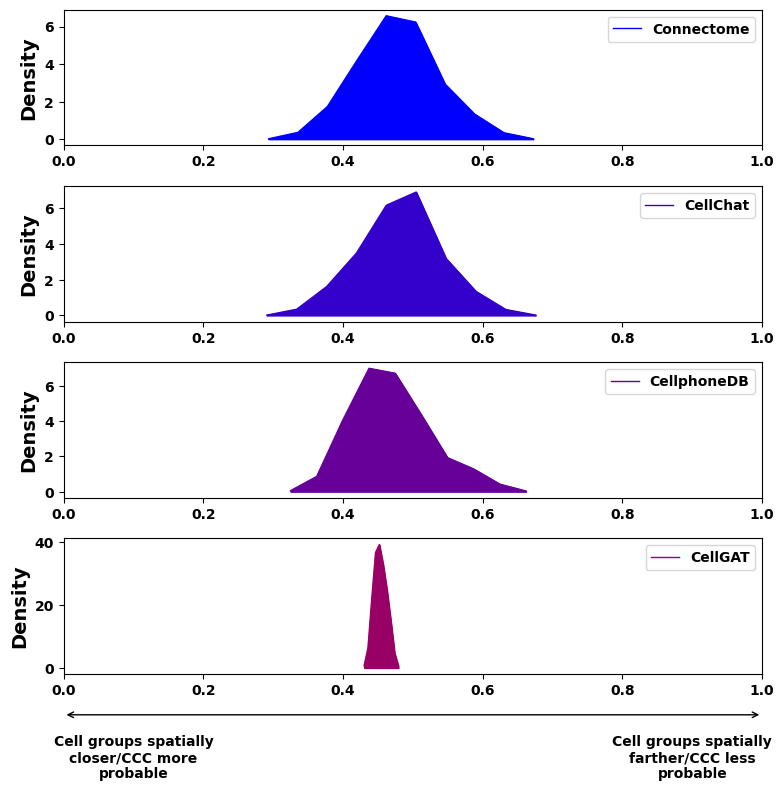

In [54]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as grid_spec
from matplotlib.font_manager import FontProperties

# 创建GridSpec对象
gs = (grid_spec.GridSpec(len(comparison_labels), 1))

fig = plt.figure(figsize=(8, 8))

i = 0
ax_objs = []

for df, label in zip(df_list, comparison_labels):
    ax_objs.append(fig.add_subplot(gs[i:i + 1, 0:]))
    plot = df.plot.kde(ax=ax_objs[-1], color=colors[i], lw=1, ind=10)
    x = plot.get_children()[0]._x
    y = plot.get_children()[0]._y
    plot.legend()
    ax_objs[-1].fill_between(x, y, color=colors[i])
    ax_objs[-1].set_xlim(0, 1)
    i += 1

# 设置纵轴标签字体
font = FontProperties()
font.set_family('Arial')
font.set_weight('bold')
for ax in ax_objs:
    ax.set_ylabel('Density', fontsize=14, fontproperties=font)

plt.annotate('', xy=(0, -0.3), xycoords='axes fraction', xytext=(1, -0.3),
             arrowprops=dict(arrowstyle="<->"))
plt.text(0.1, -35, 'Cell groups spatially\ncloser/CCC more\nprobable', ha="center")
plt.text(0.9, -35, 'Cell groups spatially\nfarther/CCC less\nprobable', ha="center")

# 保存为图片
plt.tight_layout()
plt.savefig('../../results/Cardiac_100_compare.png', dpi=300)
plt.show()
